# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

from sklearn.utils import resample

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [3]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [4]:
fraud.shape

(1000000, 8)

<Axes: xlabel='fraud'>

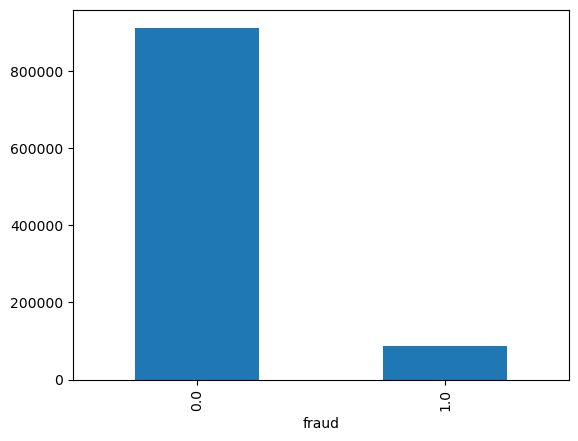

In [5]:
# 1 - We are dealing with an imbalanced set

fraud["fraud"].value_counts().plot(kind="bar")

In [6]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
pd.DataFrame(X_train_scaled, columns = X_train.columns)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.325934,-0.140904,-0.303033,0.365888,1.360955,-0.334012,-1.363937
1,-0.325579,-0.146695,-0.459363,0.365888,-0.734778,-0.334012,0.733172
2,5.084909,-0.178279,-0.320021,0.365888,1.360955,-0.334012,0.733172
3,0.845204,-0.118763,0.319027,0.365888,-0.734778,-0.334012,0.733172
4,-0.353319,-0.138148,-0.211904,0.365888,-0.734778,-0.334012,-1.363937
...,...,...,...,...,...,...,...
749995,1.439505,-0.130286,-0.311769,0.365888,-0.734778,-0.334012,0.733172
749996,-0.364545,-0.187061,0.187618,0.365888,1.360955,-0.334012,-1.363937
749997,-0.095287,-0.173173,-0.297067,0.365888,1.360955,-0.334012,-1.363937
749998,-0.368622,0.132741,-0.572260,0.365888,-0.734778,-0.334012,0.733172


In [9]:
# 2 Linear Regression

log_reg = LogisticRegression()

In [10]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
log_reg.score(X_test_scaled, y_test)

0.958892

In [12]:
# 3 Model Evaluation

pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228138
         1.0       0.89      0.60      0.72     21862

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



In [13]:
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", log_reg.score(X_test_scaled, y_test))

MAE 0.041108
RMSE 0.2027510789120492
R2 score 0.958892


In [14]:
# 4 Oversampling

train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.325934,-0.140904,-0.303033,0.365888,1.360955,-0.334012,-1.363937
1,-0.325579,-0.146695,-0.459363,0.365888,-0.734778,-0.334012,0.733172
2,5.084909,-0.178279,-0.320021,0.365888,1.360955,-0.334012,0.733172
3,0.845204,-0.118763,0.319027,0.365888,-0.734778,-0.334012,0.733172
4,-0.353319,-0.138148,-0.211904,0.365888,-0.734778,-0.334012,-1.363937
...,...,...,...,...,...,...,...
749995,1.439505,-0.130286,-0.311769,0.365888,-0.734778,-0.334012,0.733172
749996,-0.364545,-0.187061,0.187618,0.365888,1.360955,-0.334012,-1.363937
749997,-0.095287,-0.173173,-0.297067,0.365888,1.360955,-0.334012,-1.363937
749998,-0.368622,0.132741,-0.572260,0.365888,-0.734778,-0.334012,0.733172


In [15]:
train["fraud"] = y_train.values
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.325934,-0.140904,-0.303033,0.365888,1.360955,-0.334012,-1.363937,0.0
1,-0.325579,-0.146695,-0.459363,0.365888,-0.734778,-0.334012,0.733172,0.0
2,5.084909,-0.178279,-0.320021,0.365888,1.360955,-0.334012,0.733172,0.0
3,0.845204,-0.118763,0.319027,0.365888,-0.734778,-0.334012,0.733172,0.0
4,-0.353319,-0.138148,-0.211904,0.365888,-0.734778,-0.334012,-1.363937,0.0
...,...,...,...,...,...,...,...,...
749995,1.439505,-0.130286,-0.311769,0.365888,-0.734778,-0.334012,0.733172,1.0
749996,-0.364545,-0.187061,0.187618,0.365888,1.360955,-0.334012,-1.363937,0.0
749997,-0.095287,-0.173173,-0.297067,0.365888,1.360955,-0.334012,-1.363937,0.0
749998,-0.368622,0.132741,-0.572260,0.365888,-0.734778,-0.334012,0.733172,0.0


In [16]:
train["fraud"].value_counts()

fraud
0.0    684459
1.0     65541
Name: count, dtype: int64

In [17]:
yes_fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [18]:
print(yes_fraud.shape)
print(no_fraud.shape)

(65541, 8)
(684459, 8)


In [19]:
# RESAMPLING

yes_fraud_oversampled = resample(yes_fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

yes_fraud_oversampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
498351,0.194279,-0.158879,1.002687,0.365888,-0.734778,-0.334012,0.733172,1.0
487489,-0.328925,-0.183561,0.916870,0.365888,1.360955,-0.334012,0.733172,1.0
524873,-0.321643,-0.181575,3.893359,0.365888,-0.734778,-0.334012,0.733172,1.0
242760,-0.371193,-0.186177,1.769823,0.365888,-0.734778,-0.334012,0.733172,1.0
480437,-0.240916,-0.159263,4.389460,0.365888,-0.734778,-0.334012,0.733172,1.0
...,...,...,...,...,...,...,...,...
36430,-0.381311,-0.185725,2.130644,-2.733074,-0.734778,-0.334012,0.733172,1.0
749920,0.123236,-0.139239,1.387297,0.365888,-0.734778,-0.334012,0.733172,1.0
603665,-0.011171,-0.185452,1.177934,0.365888,-0.734778,-0.334012,0.733172,1.0
682762,-0.396597,-0.184402,1.709534,-2.733074,-0.734778,-0.334012,-1.363937,1.0


In [20]:
train_over = pd.concat([yes_fraud_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
498351,0.194279,-0.158879,1.002687,0.365888,-0.734778,-0.334012,0.733172,1.0
487489,-0.328925,-0.183561,0.916870,0.365888,1.360955,-0.334012,0.733172,1.0
524873,-0.321643,-0.181575,3.893359,0.365888,-0.734778,-0.334012,0.733172,1.0
242760,-0.371193,-0.186177,1.769823,0.365888,-0.734778,-0.334012,0.733172,1.0
480437,-0.240916,-0.159263,4.389460,0.365888,-0.734778,-0.334012,0.733172,1.0
...,...,...,...,...,...,...,...,...
749993,-0.107910,0.204447,-0.605113,0.365888,-0.734778,-0.334012,0.733172,0.0
749996,-0.364545,-0.187061,0.187618,0.365888,1.360955,-0.334012,-1.363937,0.0
749997,-0.095287,-0.173173,-0.297067,0.365888,1.360955,-0.334012,-1.363937,0.0
749998,-0.368622,0.132741,-0.572260,0.365888,-0.734778,-0.334012,0.733172,0.0


<Axes: xlabel='fraud'>

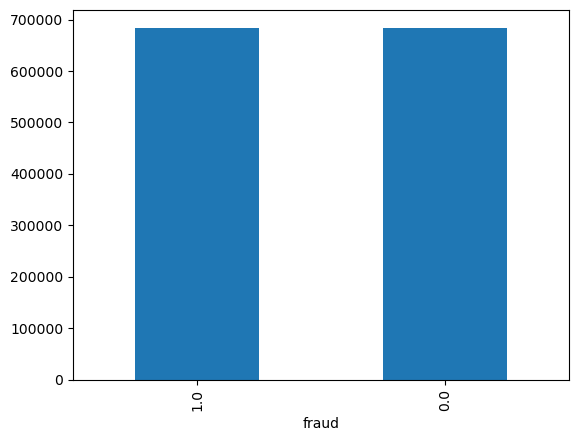

In [21]:
train_over["fraud"].value_counts().plot(kind="bar")

In [22]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [23]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [24]:
log_reg.score(X_test_scaled, y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.933732

In [25]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228138
         1.0       0.57      0.95      0.71     21862

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [26]:
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", log_reg.score(X_test_scaled, y_test))

MAE 0.066268
RMSE 0.25742571744097364
R2 score 0.933732


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
# model performs better after oversampling

In [28]:
# 5 Undersampling

train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.325934,-0.140904,-0.303033,0.365888,1.360955,-0.334012,-1.363937,0.0
1,-0.325579,-0.146695,-0.459363,0.365888,-0.734778,-0.334012,0.733172,0.0
2,5.084909,-0.178279,-0.320021,0.365888,1.360955,-0.334012,0.733172,0.0
3,0.845204,-0.118763,0.319027,0.365888,-0.734778,-0.334012,0.733172,0.0
4,-0.353319,-0.138148,-0.211904,0.365888,-0.734778,-0.334012,-1.363937,0.0
...,...,...,...,...,...,...,...,...
749995,1.439505,-0.130286,-0.311769,0.365888,-0.734778,-0.334012,0.733172,1.0
749996,-0.364545,-0.187061,0.187618,0.365888,1.360955,-0.334012,-1.363937,0.0
749997,-0.095287,-0.173173,-0.297067,0.365888,1.360955,-0.334012,-1.363937,0.0
749998,-0.368622,0.132741,-0.572260,0.365888,-0.734778,-0.334012,0.733172,0.0


In [40]:
no_fraud_undersampled = resample(no_fraud,
                                 replace=True, 
                                 n_samples=len(yes_fraud),
                                 random_state=0)

no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
334807,-0.279684,-0.097974,0.395330,0.365888,-0.734778,2.993905,-1.363937,0.0
477541,-0.173336,-0.186932,0.389680,0.365888,-0.734778,-0.334012,0.733172,0.0
129233,-0.216264,-0.180824,0.066562,0.365888,1.360955,-0.334012,-1.363937,0.0
166791,-0.356665,-0.139142,-0.428633,0.365888,-0.734778,-0.334012,0.733172,0.0
394090,-0.288219,-0.189410,-0.566753,0.365888,1.360955,2.993905,0.733172,0.0
...,...,...,...,...,...,...,...,...
5980,-0.113225,-0.183971,0.077957,0.365888,-0.734778,-0.334012,0.733172,0.0
194542,-0.103006,-0.175084,-0.458655,0.365888,-0.734778,2.993905,0.733172,0.0
405678,-0.312393,-0.154073,0.263901,0.365888,-0.734778,-0.334012,0.733172,0.0
586099,0.381665,-0.176192,0.184711,0.365888,1.360955,-0.334012,0.733172,0.0


In [41]:
train_under = pd.concat([no_fraud_undersampled, yes_fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
334807,-0.279684,-0.097974,0.395330,0.365888,-0.734778,2.993905,-1.363937,0.0
477541,-0.173336,-0.186932,0.389680,0.365888,-0.734778,-0.334012,0.733172,0.0
129233,-0.216264,-0.180824,0.066562,0.365888,1.360955,-0.334012,-1.363937,0.0
166791,-0.356665,-0.139142,-0.428633,0.365888,-0.734778,-0.334012,0.733172,0.0
394090,-0.288219,-0.189410,-0.566753,0.365888,1.360955,2.993905,0.733172,0.0
...,...,...,...,...,...,...,...,...
749920,0.123236,-0.139239,1.387297,0.365888,-0.734778,-0.334012,0.733172,1.0
749937,0.266823,-0.120405,1.898416,0.365888,1.360955,-0.334012,0.733172,1.0
749953,0.661473,-0.185012,1.086056,0.365888,-0.734778,-0.334012,0.733172,1.0
749994,-0.210204,-0.174990,1.599186,0.365888,-0.734778,-0.334012,0.733172,1.0


<Axes: xlabel='fraud'>

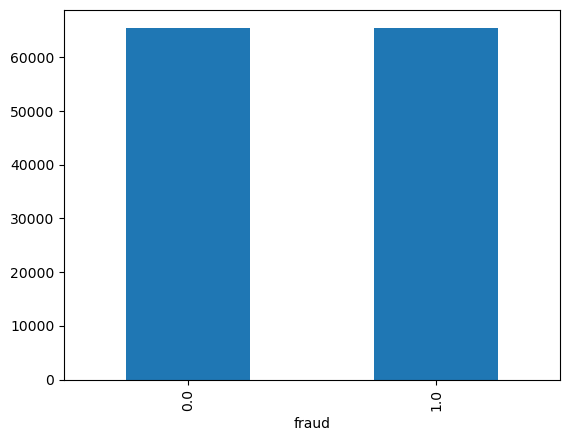

In [42]:
train_under["fraud"].value_counts().plot(kind="bar")

In [51]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [52]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [54]:
log_reg.score(X_test_scaled, y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.933752

In [55]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228138
         1.0       0.57      0.95      0.71     21862

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [56]:
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", log_reg.score(X_test_scaled, y_test))

MAE 0.066248
RMSE 0.2573868683519033
R2 score 0.933752


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# model performs better after undersampling and very similar to the oversampled test

In [57]:
# SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1, sampling_strategy=1.0)

X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [58]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [59]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228138
         1.0       0.57      0.95      0.71     21862

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [60]:
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", log_reg.score(X_test_scaled, y_test))

MAE 0.06636
RMSE 0.25760434778939584
R2 score 0.93364
